# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [4]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return 2*x*numpy.sin(x)-(x**2-2)*numpy.cos(x)-2

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [5]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [6]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    
    # YOUR CODE HERE
    return g(xmax)-g(xmin)

Check your analytic function:

In [7]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [8]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    N = 2*N
    deltax = (xmax-xmin)/(0.5* N)
    answer = 0
    
    for i in range (0,N+1,1):
        i = i/2
        print ('i = ' + str(i))
        xi = xmin + i*deltax
        print ('xi = ' + str(xi))
        if xi == xmin or xi == xmax:
            answer = answer + f(xi)
            print (str(f(xi))+ ' added once')
        elif (2*i)%2 == 1:
            answer = answer + 4*f(xi)
            print (str(f(xi))+ ' added fourtimes')
        elif (2*i)%2 == 0:
            answer = answer + 2*f(xi)
            print (str(f(xi))+ ' added twice')
        else:
            print ('broken')
    print ('answer = ' + str(answer))
    return answer * ((deltax)/(6))

Make sure you have implemented Simpson's rule correctly:

In [9]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

i = 0.0
xi = 0.0
0.0 added once
i = 0.5
xi = 2.0
3.637189707302727 added fourtimes
i = 1.0
xi = 4.0
-12.108839924926851 added once
answer = 2.439918904284056


In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

i = 0.0
xi = 0.0
0.0 added once
i = 0.5
xi = 0.04
6.398293469861466e-05 added fourtimes
i = 1.0
xi = 0.08
0.0005114540414027053 added twice
i = 1.5
xi = 0.12
0.0017238557849604387 added fourtimes
i = 2.0
xi = 0.16
0.0040785460893246975 added twice
i = 2.5
xi = 0.2
0.00794677323180245 added fourtimes
i = 3.0
xi = 0.24
0.013691671282202951 added twice
i = 3.5
xi = 0.28
0.021666282847426523 added fourtimes
i = 4.0
xi = 0.32
0.03221161580709046 added twice
i = 4.5
xi = 0.36
0.04565474063245165 added fourtimes
i = 5.0
xi = 0.4
0.06230693476938409 added twice
i = 5.5
xi = 0.44
0.08246188043677752 added fourtimes
i = 6.0
xi = 0.48
0.10639392204475766 added twice
i = 6.5
xi = 0.52
0.13435638927294644 added fourtimes
i = 7.0
xi = 0.56
0.16657999166798906 added twice
i = 7.5
xi = 0.6
0.20327129042221273 added fourtimes
i = 8.0
xi = 0.64
0.24461125278203583 added twice
i = 8.5
xi = 0.68
0.29075389430613996 added fourtimes
i = 9.0
xi = 0.72
0.34182501395001164 added twice
i = 9.5
xi = 0.76
0.39792

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Title')

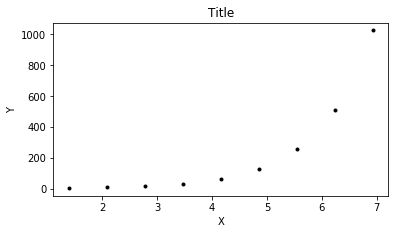

In [22]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
logpanel = numpy.log(panel_counts)

y = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
x = logpanel


Graphtitle = 'Title'
ytitle = 'Y'
xtitle = 'X'
linecolour = '#0073CF'

plt.figure() 
plt.subplot2grid((10,10),(0,0),colspan=10,rowspan=8) 
plt.errorbar(x,y, fmt='k.') 
plt.ylabel(ytitle) 
plt.xlabel(xtitle) 
plt.title(Graphtitle) 

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

YOUR ANSWER HERE

If the trapezium rule was being used, how would the panel
count affect accuracy? 

YOUR ANSWER HERE